Import libraries

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

Image Addition

In [2]:
x = np.uint8([250])
y = np.uint8([10])
print(cv.add(x,y)) # 250+10 = 260 => 255
print(x+y) # 250+10 = 260 % 256 = 4

[[255]]
[4]


Image Blending

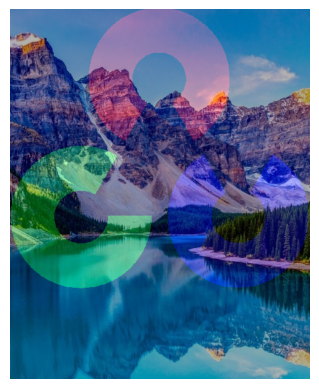

In [4]:
img1 = cv.imread('../images/nature.jpg')
img2 = cv.imread('../images/opencv_logo.png')
assert img1 is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read, check with os.path.exists()"
dst = cv.addWeighted(img1,0.7,img2,0.3,0)
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))
plt.axis('off')  # Hide the axis
plt.show()

Bitwise Operations

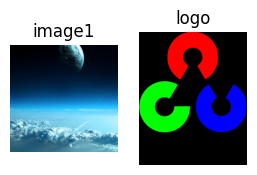

In [29]:
# Load the images
img1 = cv.imread('../images/spase.jpg')
img2 = cv.imread('../images/opencv_logo.png')

# Check if images were loaded successfully
assert img1 is not None, "img1 could not be read, check with os.path.exists()"
assert img2 is not None, "img2 could not be read, check with os.path.exists()"
plt.subplot(143),plt.axis('off'),plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB)),plt.title('image1')
plt.subplot(144),plt.axis('off'),plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB)),plt.title('logo')
plt.show()

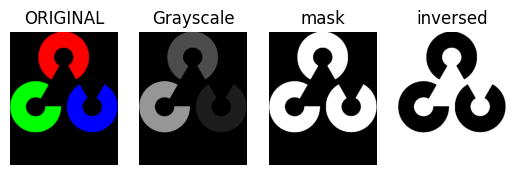

In [30]:

# Convert logo image to grayscale
img2gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
# Create binary mask and its inverse
ret, mask = cv.threshold(img2gray, 10, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)
plt.subplot(141),plt.axis('off'),plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB)),plt.title('ORIGINAL')
plt.subplot(142),plt.axis('off'),plt.imshow(cv.cvtColor(img2gray, cv.COLOR_BGR2RGB)),plt.title('Grayscale')
plt.subplot(143),plt.axis('off'),plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB)),plt.title('mask')
plt.subplot(144),plt.axis('off'),plt.imshow(cv.cvtColor(mask_inv, cv.COLOR_BGR2RGB)),plt.title('inversed')
plt.show()


(600, 487, 3)
(600, 487)


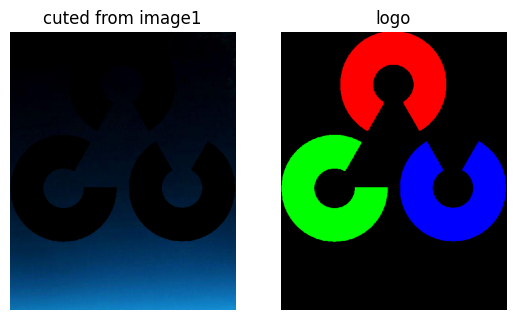

In [31]:
# Create a region of interest (ROI)
rows, cols, channels = img2.shape
roi = img1[0:rows, 0:cols]
print(roi.shape)
print(mask_inv.shape)
# Ensure that img1_bg and img2_fg have the same data type (CV_8U)
img1_bg = cv.bitwise_and(roi, roi, mask=mask_inv).astype('uint8')
img2_fg = cv.bitwise_and(img2, img2, mask=mask).astype('uint8')
plt.subplot(121),plt.axis('off'),plt.imshow(cv.cvtColor(img1_bg, cv.COLOR_BGR2RGB)),plt.title('cuted from image1')
plt.subplot(122),plt.axis('off'),plt.imshow(cv.cvtColor(img2_fg, cv.COLOR_BGR2RGB)),plt.title('logo')
plt.show()

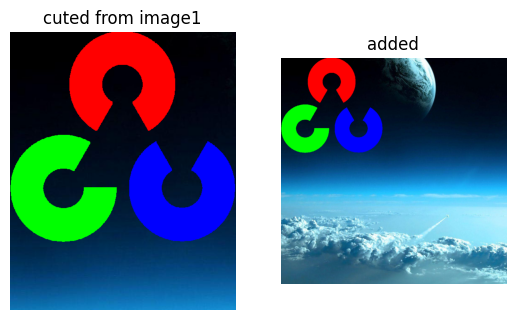

In [32]:
# Overlay the logo on the main image
dst = cv.add(img1_bg, img2_fg)

# Replace ROI in the main image with the overlay
img1[0:rows, 0:cols] = dst

plt.subplot(121),plt.axis('off'),plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB)),plt.title('cuted from image1')
plt.subplot(122),plt.axis('off'),plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB)),plt.title('added')
plt.show()